In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("dark_background")

In [2]:
qbbc = pd.read_csv('qbbc_100neut_100mev.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process"])
berthp = pd.read_csv('qgspberthp_100neut_100mev.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process"])
bichp = pd.read_csv('qgspbichp_100neut_100mev.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process"])
inclxxhp = pd.read_csv('qgspinclxxhp_100neut_100mev.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process"])
inclxx = pd.read_csv('qgspinclxxx_100neut_100mev.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process"])

## Proton detection analysis

In [7]:
protons = qbbc.loc[qbbc['Particle'] == "proton"]                             #Shows only the proton rows.
detprotons = protons.loc[qbbc['Energy'] >= 0.001]                          #Setting an arbitrary lower energy limit.
print("Minimum proton energy:", min(detprotons["Energy"]))
print("Maximum proton energy:", max(detprotons["Energy"]))
detprotons.reset_index(drop = True)                                          #Resets indexing of dataframe.

Minimum proton energy: 0.00112492
Maximum proton energy: 11.8298


,X,Y,Z,Energy,Particle,Volume,Process
0,-181.599,290.327,1411.43,2.459520,proton,Counter6,hIoni
1,-181.598,290.327,1411.43,0.002008,proton,Counter6,hIoni
2,-218.609,232.018,1443.66,9.002530,proton,Counter6,hIoni
3,-220.242,230.279,1439.35,7.867500,proton,Counter6,hIoni
4,-221.536,228.911,1435.87,6.874590,proton,Counter6,hIoni
...,...,...,...,...,...,...,...
983,-285.726,-254.721,1458.56,2.489630,proton,Counter4,hIoni
984,-285.671,-254.707,1458.26,2.481790,proton,Counter4,hIoni
985,-285.625,-254.694,1458.02,2.418830,proton,Counter4,hIoni
986,-285.593,-254.686,1457.84,2.855960,proton,Counter4,hIoni


In [8]:
numproton = detprotons.groupby(["Volume"]).Particle.count().reset_index().sort_values(by = ["Particle"], ascending = False)
numproton.reset_index(drop = True)                                                            #Checks the number of proton detections per volume.

,Volume,Particle
0,Counter4,161
1,Counter6,123
2,Counter11,115
3,Counter5,78
4,Counter10,69
5,Counter12,64
6,Counter13,61
7,Counter15,61
8,Counter3,47
9,Counter9,46


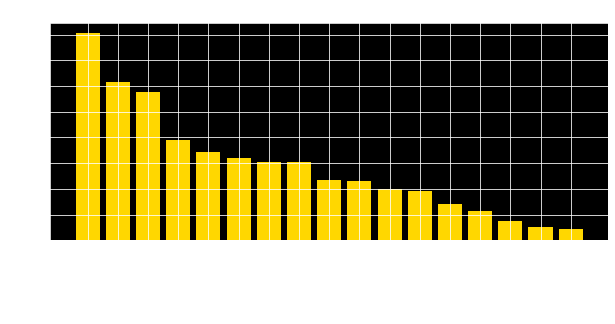

In [14]:
kep = plt.figure(figsize = (10, 4))

plt.bar(numproton["Volume"], numproton["Particle"], color = "gold")
plt.xticks(rotation='vertical')
plt.xlabel("Volumes", fontsize = 13)
plt.ylabel("Protons detected", fontsize = 13)
plt.title("Number of protons detected by the volumes using QBBC", fontsize = 13)
#plt.yscale("log")
plt.grid()

kep.savefig("proton_num.png", bbox_inches="tight")

In [11]:
enproton = detprotons.groupby(["Volume"]).Energy.sum().reset_index().sort_values(by = ["Energy"], ascending = False) #Checks the sum of energies per volume.
enproton.reset_index(drop = True)

,Volume,Energy
0,Counter4,461.263773
1,Counter11,335.824692
2,Counter6,271.380425
3,Counter5,248.258788
4,Counter10,213.720702
5,Counter13,208.983504
6,Counter12,200.928744
7,Counter15,112.438681
8,Counter9,109.652941
9,Counter7,106.532952


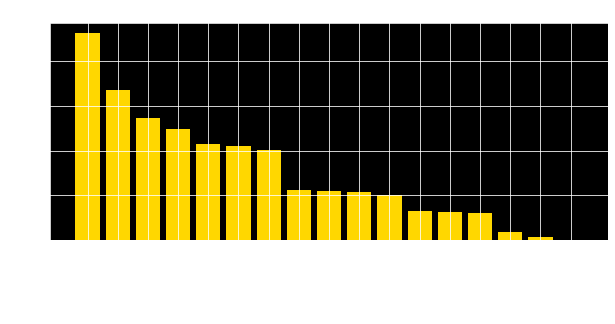

In [13]:
kep = plt.figure(figsize = (10, 4))

plt.bar(enproton["Volume"], enproton["Energy"], color = "gold")
plt.xticks(rotation='vertical')
plt.xlabel("Volumes", fontsize = 13)
plt.ylabel("Relative energy", fontsize = 13)
plt.title("Distribution of energy deposited by protons between the volumes using QBBC", fontsize = 13)
#plt.yscale("log")
plt.grid()

kep.savefig("proton_en.png", bbox_inches="tight")

## Tracked protons

In [83]:
pr1 = pd.read_csv('protonos_1.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process", "TrackID", "EventID"])
pr2 = pd.read_csv('protonos_2.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process", "TrackID", "EventID"])
pr3 = pd.read_csv('protonos_3.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process", "TrackID", "EventID"])
pr4 = pd.read_csv('protonos_4.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process", "TrackID", "EventID"])
pr5 = pd.read_csv('protonos_5.csv', comment = '#', names = ["X", "Y", "Z", "Energy", "Particle", "Volume", "Process", "TrackID", "EventID"])

In [84]:
def volumebytrackID(data, arbit_energy):
    protons = data.loc[data['Particle'] == "proton"]                                       #Shows only the proton rows.
    detprotons = protons.loc[protons['Energy'] >= arbit_energy].reset_index()              #Sets an arbitrary lower energy limit. [MeV]
    track = detprotons.sort_values(by = ["TrackID"], ascending = True).reset_index()       #Sorts by TrackID.
    matrix = track.groupby(["Volume","TrackID"]).Energy.sum().reset_index()                #Sums the energy by Volume and TrackID.
    fmatrix = matrix.pivot(index = 'TrackID', columns = 'Volume', values = 'Energy')             #Creates the Volume by TrackID matrix
    output = fmatrix.fillna(0)                                                             #Replaces NaN values with 0 values.
    return output

In [85]:
mat1 = volumebytrackID(pr1, 0.01)
mat1

Volume,Counter10,Counter11,Counter12,Counter13,Counter14,Counter15,Counter16,Counter17,Counter2,Counter3,Counter4,Counter5,Counter6,Counter7,Counter8,Counter9
TrackID,,,,,,,,,,,,,,,,
2,123.966944,199.363959,161.552077,142.447206,88.385260,274.892256,17.888580,81.379680,67.527352,45.669605,122.337221,179.320658,101.933140,383.846386,311.014502,121.004492
3,23.827213,74.126504,71.616980,27.241389,0.000000,73.322691,0.000000,1.376670,0.000000,30.108842,55.598690,47.676103,32.469578,62.262047,57.615461,40.361131
4,45.597451,0.342564,87.313399,2.005429,0.000000,11.459432,0.000000,11.083610,0.000000,0.000000,6.546993,7.459500,3.953220,2.722577,0.338710,2.043300
5,6.974643,0.109126,0.567521,3.690356,20.720280,6.462565,5.410772,10.833431,0.000000,0.000000,1.770070,6.519248,31.519366,3.902471,0.288416,1.033554
6,0.245689,0.199100,60.971124,0.082886,0.000000,0.740178,0.000000,7.075655,0.000000,0.000000,0.483132,0.000000,0.714386,5.013448,0.246735,0.263224
7,0.455911,0.000000,10.711390,0.897820,0.000000,0.321943,0.000000,0.311995,0.000000,0.000000,36.803407,20.456480,8.093052,0.417283,0.772166,9.619490
8,0.563960,0.000000,0.000000,2.891754,0.000000,0.251923,0.948290,2.044520,0.000000,0.000000,1.006120,10.107379,0.213834,0.000000,2.198130,2.367150
9,0.090272,38.458020,0.000000,24.210400,0.000000,20.236061,0.418844,2.361130,0.000000,0.000000,0.000000,0.398277,0.102476,7.807850,0.108676,0.000000
10,0.114695,0.000000,0.000000,5.340050,0.000000,4.698714,0.071418,1.332790,0.000000,0.000000,0.000000,0.000000,0.099684,0.305181,0.087244,0.000000


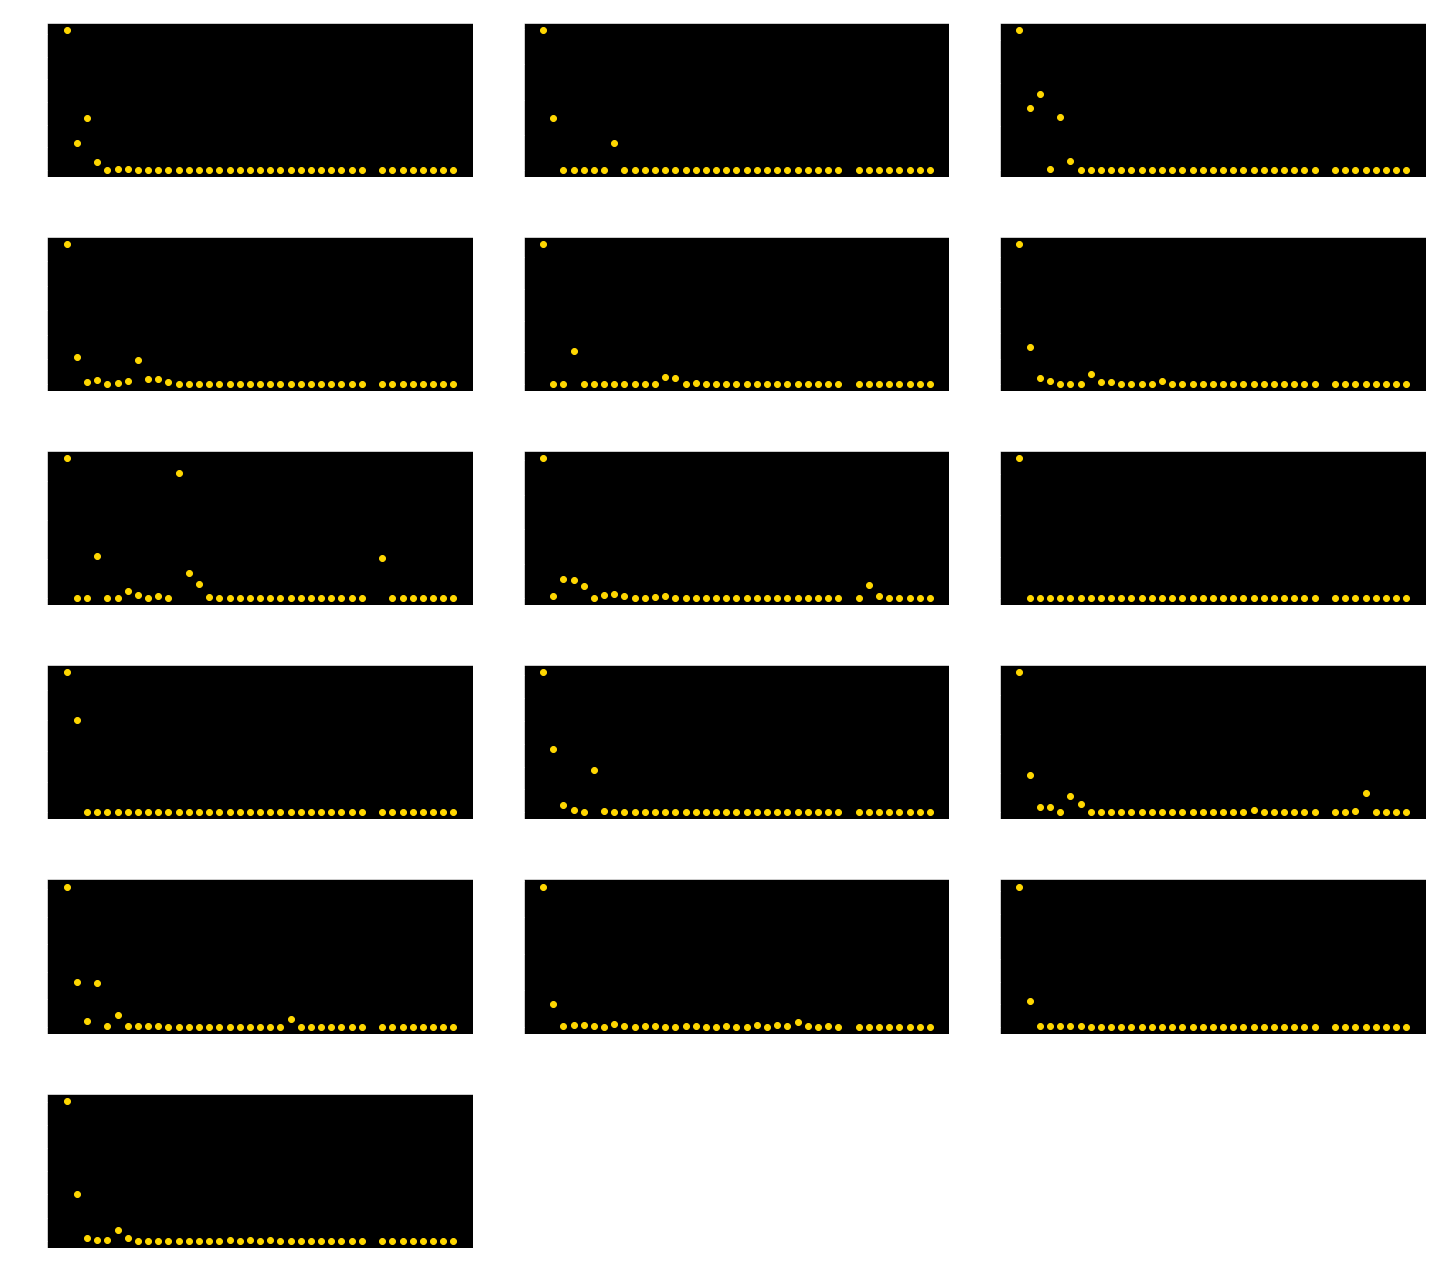

In [86]:
kep = plt.figure(figsize = (20,18))

for i in range(len(mat1.columns)):
    plt.subplot(6, 3, i + 1)
    plt.plot(mat1.index.values, mat1[mat1.columns[i]].values, color = "gold", linestyle = "", marker = 'o')
    plt.xlabel("TrackID of protons")
    plt.ylabel("Energy deposited by protons [MeV]")
    plt.title(mat1.columns.values[i])

plt.tight_layout()
plt.show()
kep.savefig("mat1.png", bbox_inches="tight")

In [87]:
mat2 = volumebytrackID(pr2, 0.01)
print(len(mat2.columns.values))

16


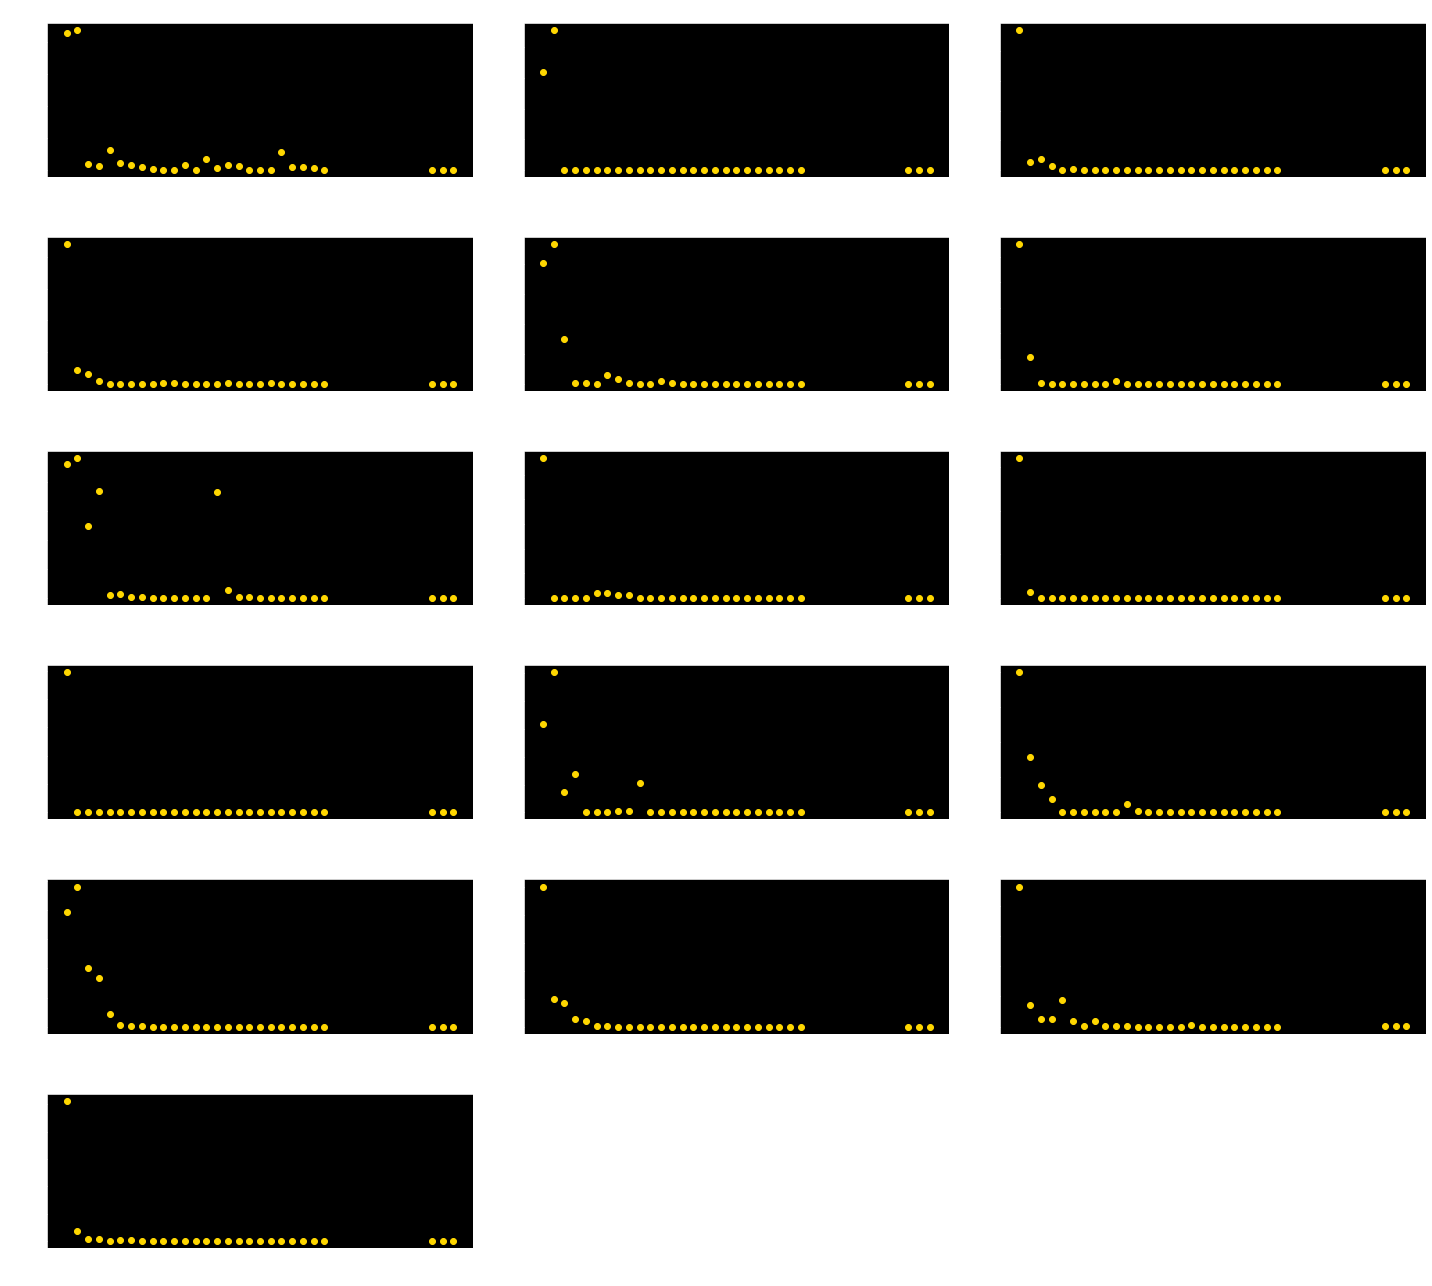

In [88]:
kep = plt.figure(figsize = (20,18))

for i in range(len(mat2.columns)):
    plt.subplot(6, 3, i + 1)
    plt.plot(mat2.index.values, mat2[mat2.columns[i]].values, color = "gold", linestyle = "", marker = 'o')
    plt.xlabel("TrackID of protons")
    plt.ylabel("Energy deposited by protons [MeV]")
    plt.title(mat2.columns.values[i])

plt.tight_layout()
plt.show()
kep.savefig("mat2.png", bbox_inches="tight")

In [89]:
mat3 = volumebytrackID(pr3, 0.01)
print(len(mat3.columns.values))

16


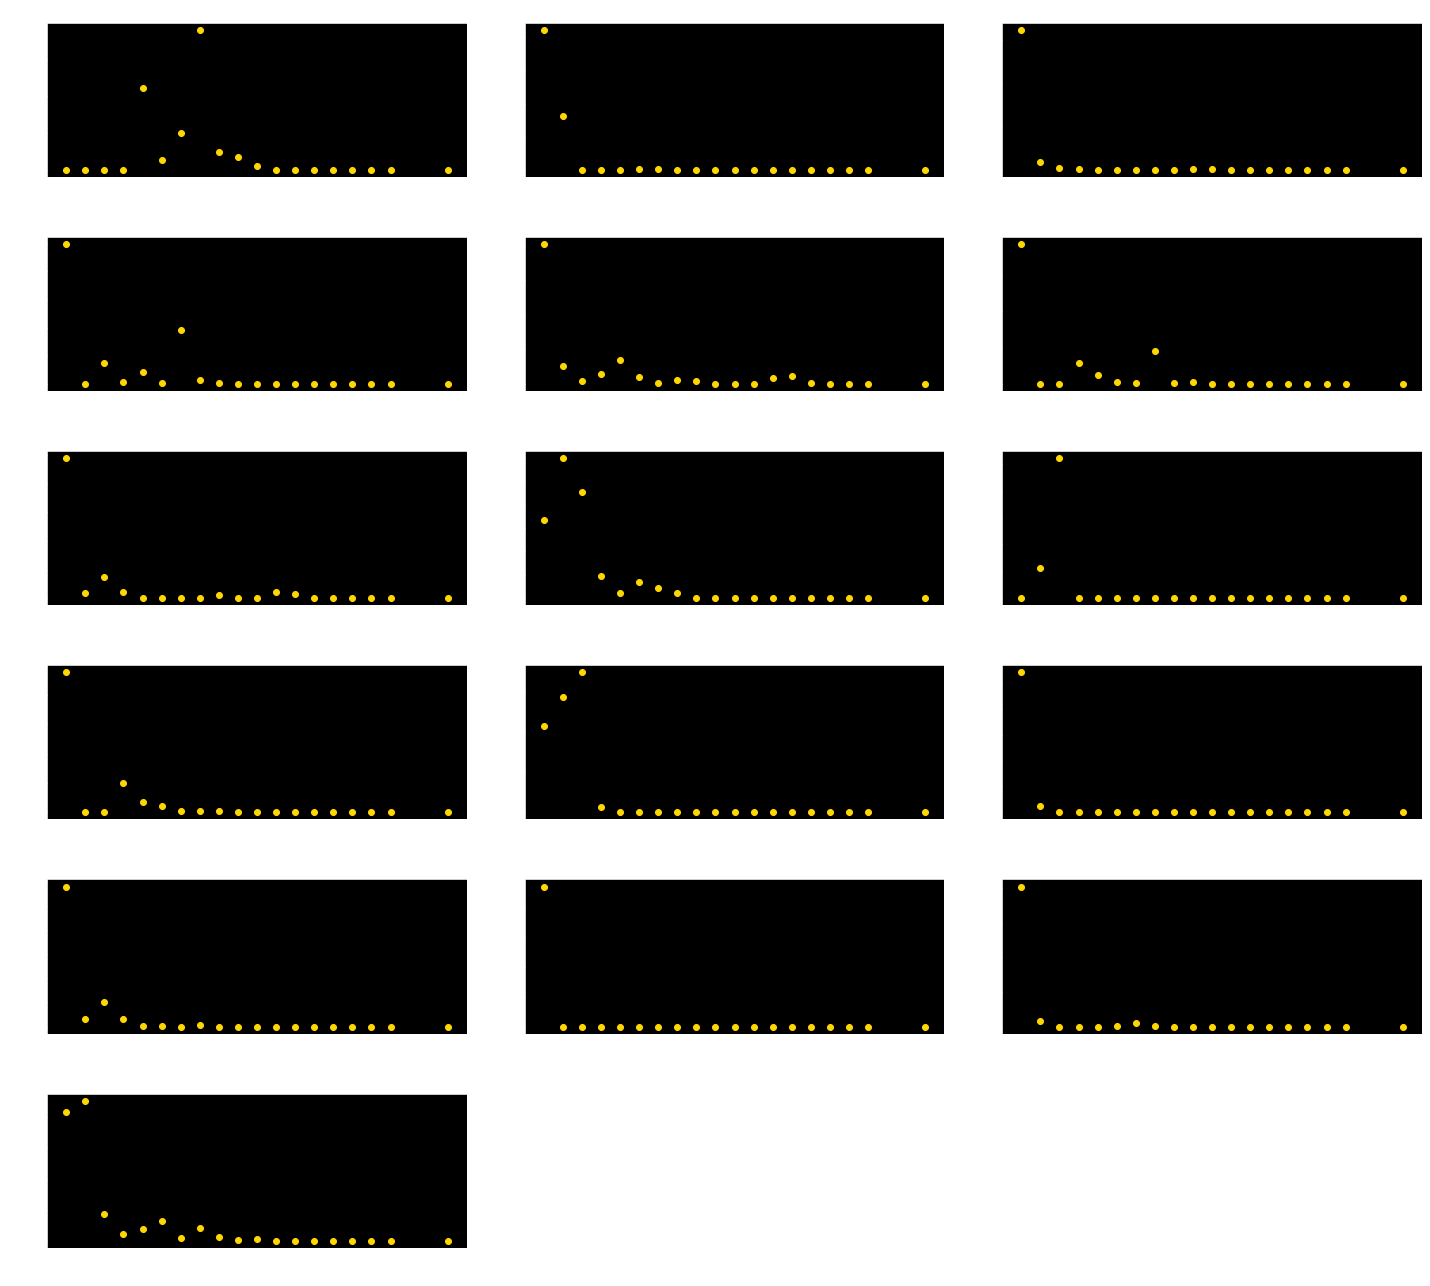

In [90]:
kep = plt.figure(figsize = (20,18))

for i in range(len(mat3.columns)):
    plt.subplot(6, 3, i + 1)
    plt.plot(mat3.index.values, mat3[mat3.columns[i]].values, color = "gold", linestyle = "", marker = 'o')
    plt.xlabel("TrackID of protons")
    plt.ylabel("Energy deposited by protons [MeV]")
    plt.title(mat3.columns.values[i])

plt.tight_layout()
plt.show()
kep.savefig("mat3.png", bbox_inches="tight")

In [91]:
mat4 = volumebytrackID(pr4, 0.01)
print(len(mat4.columns.values))

16


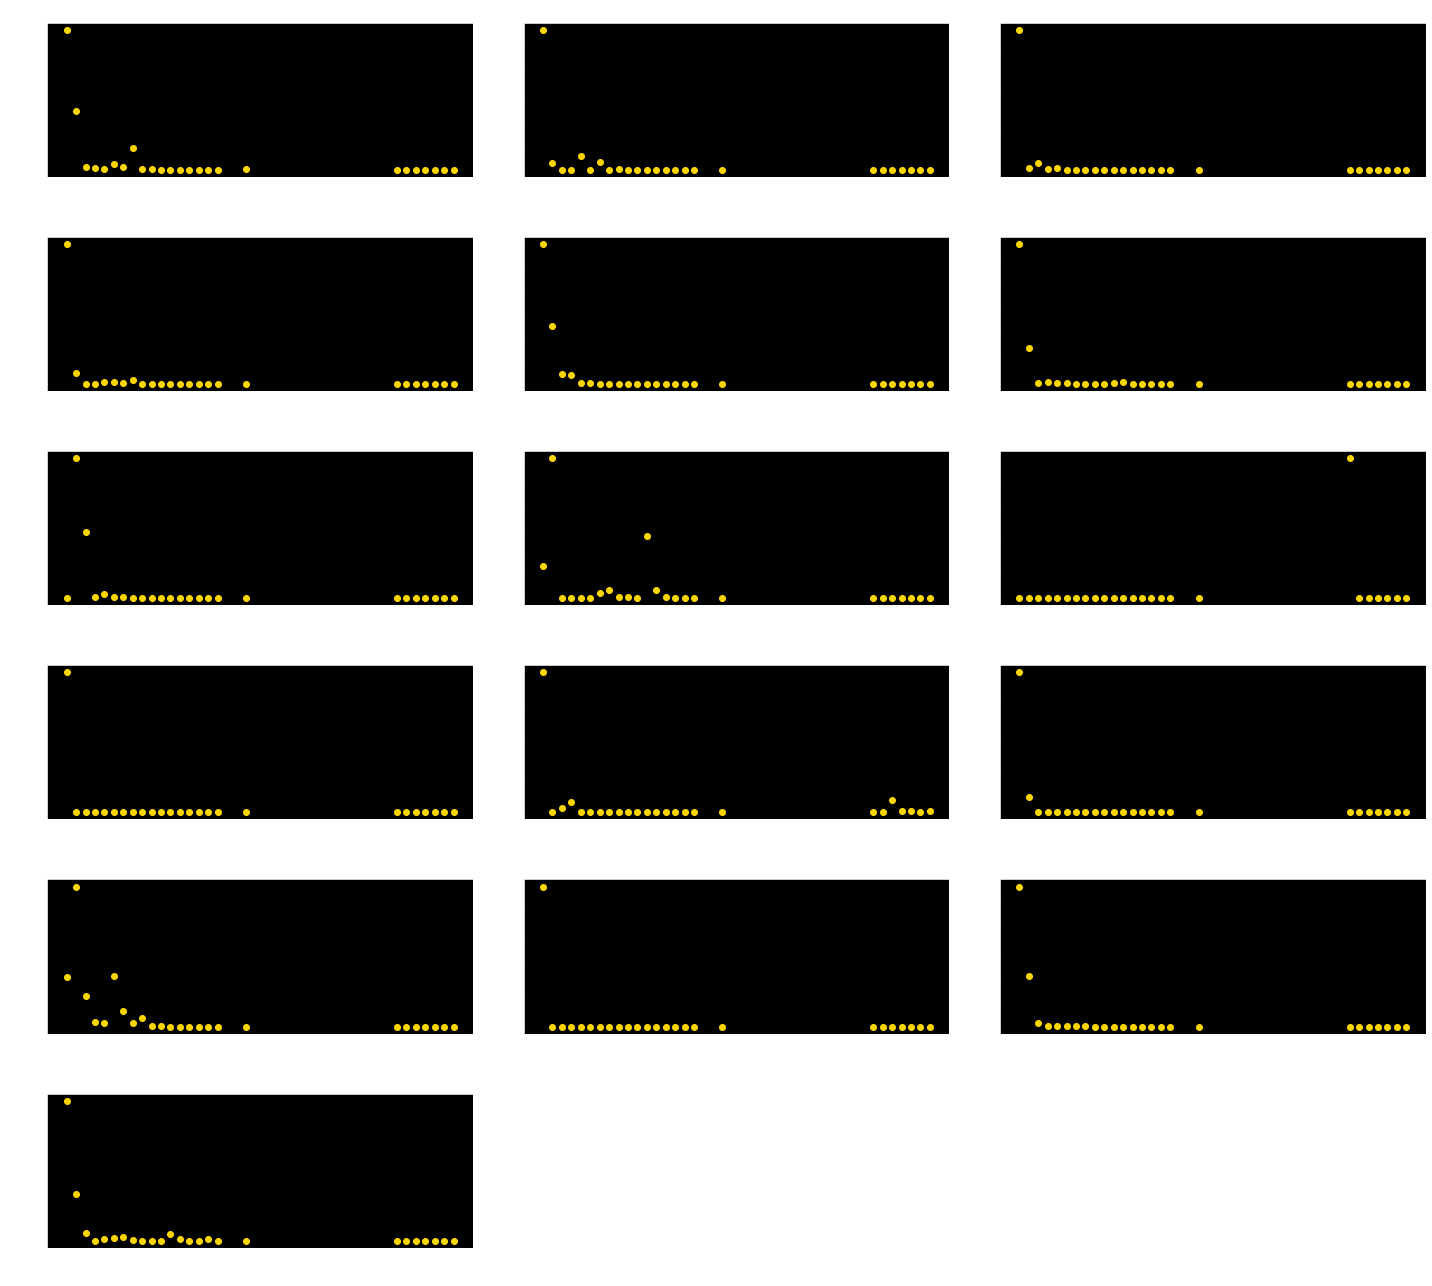

In [92]:
kep = plt.figure(figsize = (20,18))

for i in range(len(mat4.columns)):
    plt.subplot(6, 3, i + 1)
    plt.plot(mat4.index.values, mat4[mat4.columns[i]].values, color = "gold", linestyle = "", marker = 'o')
    plt.xlabel("TrackID of protons")
    plt.ylabel("Energy deposited by protons [MeV]")
    plt.title(mat4.columns.values[i])

plt.tight_layout()
plt.show()
kep.savefig("mat4.png", bbox_inches="tight")

In [93]:
mat5 = volumebytrackID(pr5, 0.01)
print(len(mat5.columns.values))

17


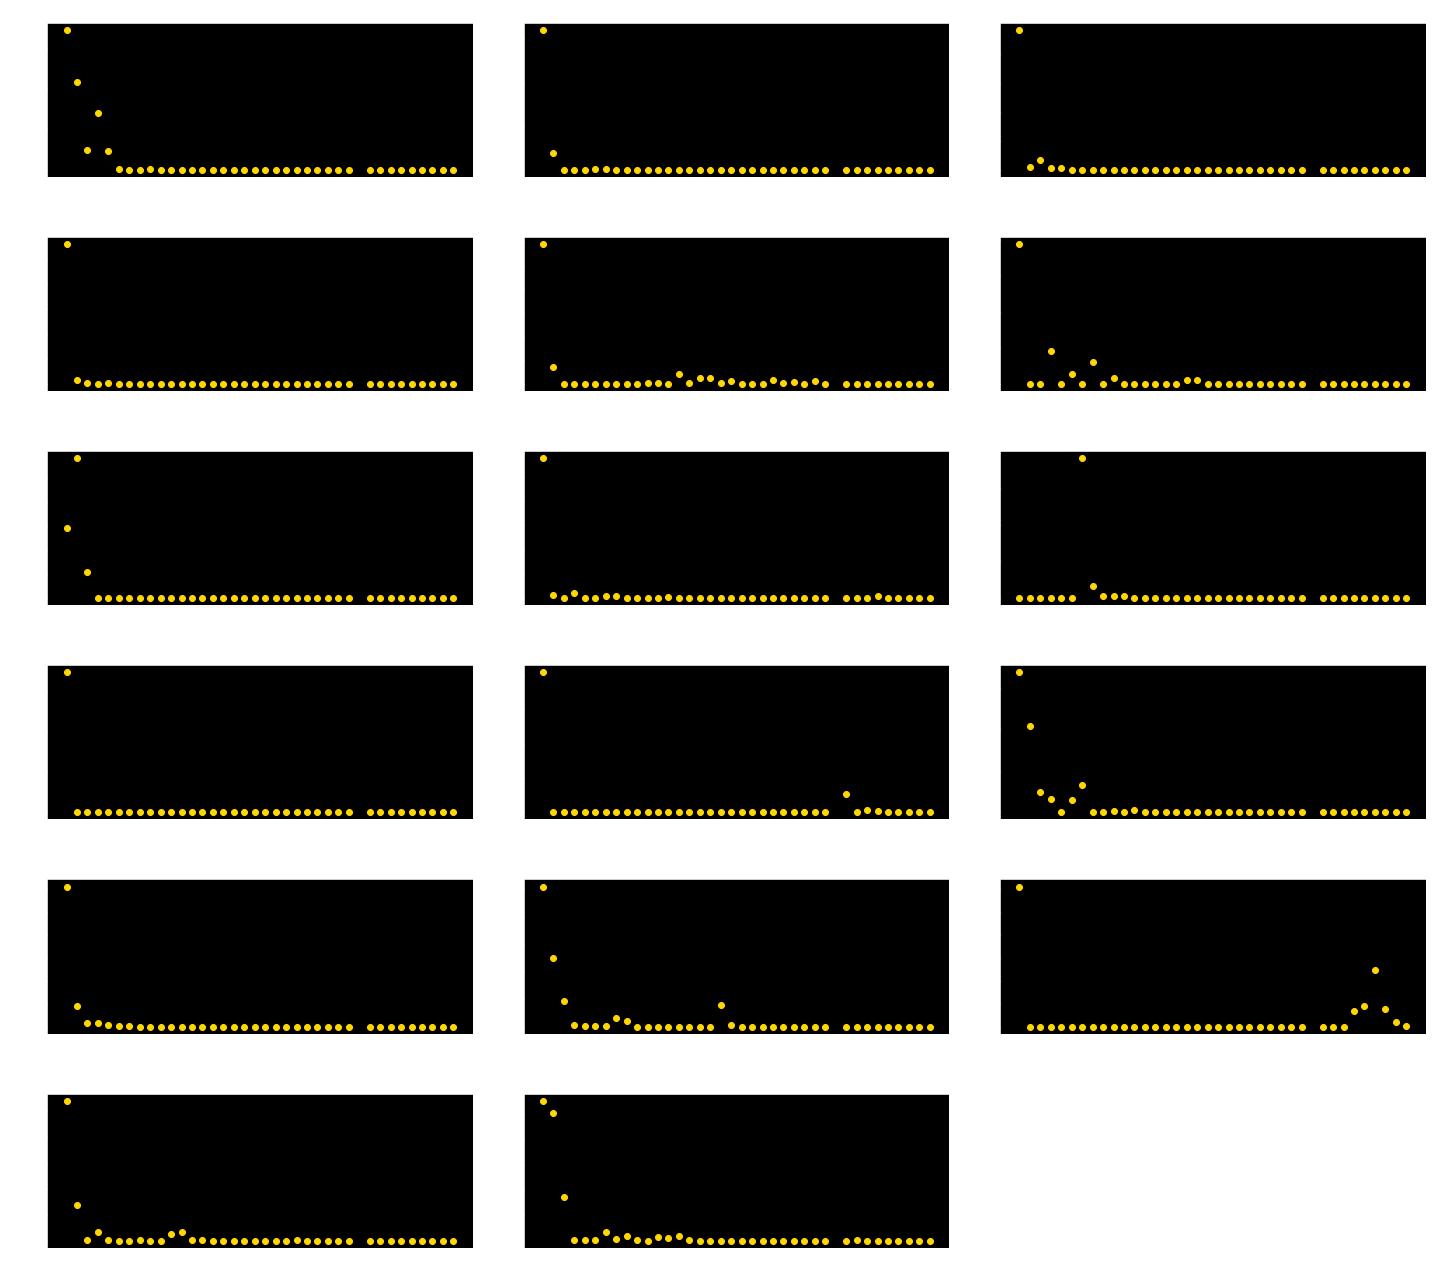

In [94]:
kep = plt.figure(figsize = (20,18))

for i in range(len(mat5.columns)):
    plt.subplot(6, 3, i + 1)
    plt.plot(mat5.index.values, mat5[mat5.columns[i]].values, color = "gold", linestyle = "", marker = 'o')
    plt.xlabel("TrackID of protons")
    plt.ylabel("Energy deposited by protons [MeV]")
    plt.title(mat5.columns.values[i])

plt.tight_layout()
plt.show()
kep.savefig("mat5.png", bbox_inches="tight")